# Title Recommendation for Indonesian News Article Using Long Short-Term Memory with Attention Mechanism - [4th Notebook]
### Final Project of Joshia Cahyadi - 10119086
---

*Notebook* ini adalah *notebook* terakhir dari 4 *notebook* lainnya. Terdapat 3 hal yang dilakukan pada *notebook* ini:
1. Menghitung nilai BERTScore untuk judul asli (bukan judul keluaran model),
2. Melakukan analisis terhadap nilai BERTScore untuk judul asli dan judul hasil keluaran model (model tanpa dan dengan mekanisme atensi),
3. Demo model.

# Melakukan Inisialisasi Libraries

In [ ]:
!pip install bert_score==0.3.13

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.5/268.5 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.6 MB/s eta 0:00:00


In [ ]:
# Libraries untuk manipulasi data
import pandas as pd
import numpy as np

# Libraries untuk interaksi dengan files
import io
import json

# Libraries untuk split data antara data training dan data validasi
from sklearn.model_selection import train_test_split

# Libraries untuk menampilkan grafik
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Libraries untuk estetika print
import textwrap

# Libraries untuk menghitung BERTScore
# import bert_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Dataset

In [ ]:
# Load dataset hasil tanpa dan dengan mekanisme atensi
df_wo_attention = pd.read_csv('/content/drive/MyDrive/Tugas Akhir 2/Files/Hasil BERTScore Model tanpa Atensi Data 2 v3.csv')
df_wi_attention = pd.read_csv('/content/drive/MyDrive/Tugas Akhir 2/Files/Hasil BERTScore Model dengan Atensi Data 2 v3.csv')

In [ ]:
df_wo_attention = df_wo_attention[['title','content_html','title_wo_attention','BERTScore_wo_attention']]

In [ ]:
# Membuat df_all
df_all = df_wo_attention.merge(df_wi_attention, left_on=['title','content_html'], right_on=['title','content_html'])

In [ ]:
df_all

,title,content_html,title_wo_attention,BERTScore_wo_attention,title_wi_attention,BERTScore_wi_attention
0,"<start> pejabat pt pal tertangkap kpk, kemente...",kementerian badan usaha milik negara akan meni...,pemerintah akan tindak tegas pelaku korupsi di...,0.617203,"bumn diduga terjaring ott kpk, bumn ditindak t...",0.572396
1,<start> dua buruh bangunan isap sabu alasannya...,"dian suchairi warga jl kamboja, desa bandar kh...",warga tapos depok temukan pistol ak 47,0.545550,warga desa ini simpan sabu di jalan desa,0.602266
2,<start> bus wisata bogor 'uncal' beroperasi se...,jalan utama di sekitar istana bogor dan kebun ...,jokowi akan mampir ke ambon dengan cek sepatu ...,0.582675,bus di ragunan ini bikin bus mangga kaki,0.587528
3,"<start> tanggapi kicauan sby, jokowi: kita har...",presiden joko widodo menanggapi dingin kicauan...,"jokowi pemblokiran media sosial, bukan media s...",0.583129,presiden jokowi jangan sebar hoax,0.562073
4,<start> ini bukti yang disita kpk saat tangkap...,undang nomor 41 tahun 2014 tentang peternakan ...,"patrialis akbar ditangkap kpk, ini alasannya",0.646702,patrialis akbar jadi tersangka patrialis akbar,0.677301
...,...,...,...,...,...,...
995,"<start> duh, indeks kebahagiaan orang indonesi...",indeks kebahagiaan rata ratamanusia indonesia ...,indonesia timur jadi brand industri perdaganga...,0.583171,startup indonesia jadi tren positif,0.576382
996,<start> elon musk bandingkan kecerdasan buatan...,"bos spacex, , menyebut lebih berbahaya ketimba...",facebook luncurkan fitur untuk tes dna,0.584896,bos rusia sebut rusia bisa jalin hubungan deng...,0.600335
997,<start> ribuan santri banyumas aksi tolak prog...,ribuan massa nahdliyin di kabupaten banyumas m...,ribuan warga unjuk rasa di depan istana merdek...,0.613402,ribuan relawan ajak kemenag cabut full day school,0.567359
998,"<start> h-5 lebaran, kalimalang mulai ramai di...","arus lalu lintas di sisi kalimalang, bekasi, k...",pemudik motor dilarang melintas di tol cipali,0.580182,pemudik motor melintas di kalimalang masih padat,0.639689


In [ ]:
# Menghilangkan <start> dan <end> dari title

## Membuat fungsi untuk menghilangkan <start> dan <end>
def remove_start_end(text):
  return ' '.join([word for word in text.split(' ') if word not in ['<start>','<end>']])

## Mengaplikasikan fungsi di atas ke title
df_all['title'] = df_all['title'].apply(lambda row: remove_start_end(row))

In [ ]:
# Menambahkan kolom article_length
df_all['article_length'] = df_all['content_html'].apply(lambda row: len(row.split(' ')))

# Menghitung BERTScore untuk Judul Asli

In [ ]:
_, _, F1 = bert_score.score([df_all['title'].iloc[0]], [df_all['content_html'].iloc[0]], lang='id', verbose=None)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# Menghitung nilai BERTScore
_, _, F1 = bert_score.score(df_all['title'].to_list(), df_all['content_html'].to_list(), lang='id', verbose=None)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# Memasukkan nilai BERTScore ke data
df_all['BERTScore_title'] = F1.numpy()

In [ ]:
df_all

,title,content_html,title_wo_attention,BERTScore_wo_attention,title_wi_attention,BERTScore_wi_attention,article_length,BERTScore_title
0,"pejabat pt pal tertangkap kpk, kementerian bum...",kementerian badan usaha milik negara akan meni...,pemerintah akan tindak tegas pelaku korupsi di...,0.617203,"bumn diduga terjaring ott kpk, bumn ditindak t...",0.572396,223,0.659348
1,dua buruh bangunan isap sabu alasannya untuk m...,"dian suchairi warga jl kamboja, desa bandar kh...",warga tapos depok temukan pistol ak 47,0.545550,warga desa ini simpan sabu di jalan desa,0.602266,159,0.623584
2,bus wisata bogor 'uncal' beroperasi setiap sab...,jalan utama di sekitar istana bogor dan kebun ...,jokowi akan mampir ke ambon dengan cek sepatu ...,0.582675,bus di ragunan ini bikin bus mangga kaki,0.587528,131,0.577210
3,"tanggapi kicauan sby, jokowi: kita harus bangu...",presiden joko widodo menanggapi dingin kicauan...,"jokowi pemblokiran media sosial, bukan media s...",0.583129,presiden jokowi jangan sebar hoax,0.562073,357,0.644394
4,ini bukti yang disita kpk saat tangkap patrial...,undang nomor 41 tahun 2014 tentang peternakan ...,"patrialis akbar ditangkap kpk, ini alasannya",0.646702,patrialis akbar jadi tersangka patrialis akbar,0.677301,54,0.638217
...,...,...,...,...,...,...,...,...
995,"duh, indeks kebahagiaan orang indonesia turun!",indeks kebahagiaan rata ratamanusia indonesia ...,indonesia timur jadi brand industri perdaganga...,0.583171,startup indonesia jadi tren positif,0.576382,287,0.618767
996,elon musk bandingkan kecerdasan buatan dan kor...,"bos spacex, , menyebut lebih berbahaya ketimba...",facebook luncurkan fitur untuk tes dna,0.584896,bos rusia sebut rusia bisa jalin hubungan deng...,0.600335,185,0.627272
997,ribuan santri banyumas aksi tolak program lima...,ribuan massa nahdliyin di kabupaten banyumas m...,ribuan warga unjuk rasa di depan istana merdek...,0.613402,ribuan relawan ajak kemenag cabut full day school,0.567359,285,0.632733
998,"h-5 lebaran, kalimalang mulai ramai dilintasi ...","arus lalu lintas di sisi kalimalang, bekasi, k...",pemudik motor dilarang melintas di tol cipali,0.580182,pemudik motor melintas di kalimalang masih padat,0.639689,163,0.623601


# Analisis Gabungan

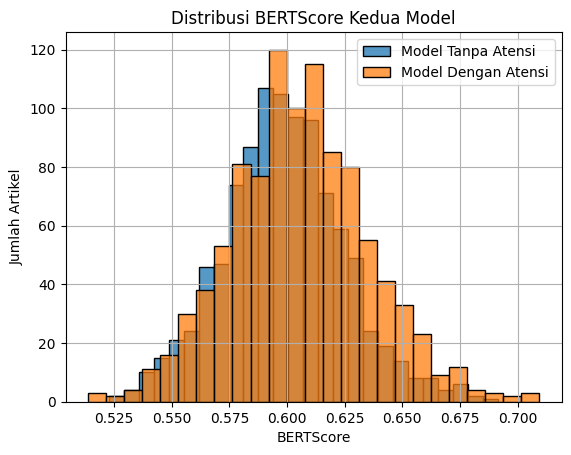

In [ ]:
# Menampilkan plot distribusi BERTScore gabungan
sns.histplot(df_all['BERTScore_wo_attention'], label='Model Tanpa Atensi')
sns.histplot(df_all['BERTScore_wi_attention'], label='Model Dengan Atensi')
plt.title('Distribusi BERTScore Kedua Model')
plt.xlabel('BERTScore')
plt.ylabel('Jumlah Artikel')
plt.legend()
plt.grid()
plt.show()

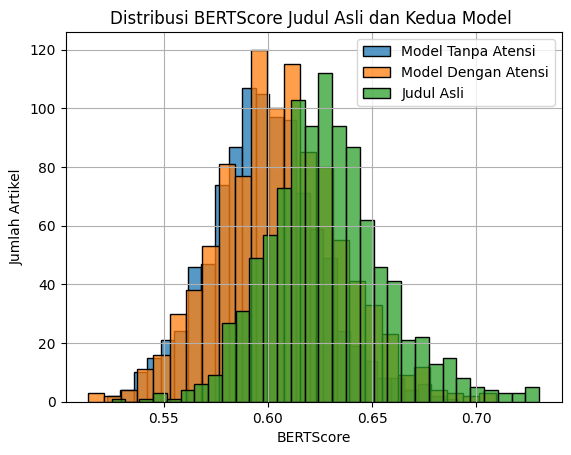

In [ ]:
# Menampilkan plot distribusi BERTScore gabungan dengan judul asli
sns.histplot(df_all['BERTScore_wo_attention'], label='Model Tanpa Atensi')
sns.histplot(df_all['BERTScore_wi_attention'], label='Model Dengan Atensi')
sns.histplot(df_all['BERTScore_title'], label='Judul Asli')
plt.title('Distribusi BERTScore Judul Asli dan Kedua Model ')
plt.xlabel('BERTScore')
plt.ylabel('Jumlah Artikel')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Mengurutkan nilai BERTScore judul asli
df_all['BERTScore_title'].sort_values(ascending=False)

561    0.730221
488    0.730097
351    0.729693
168    0.724445
778    0.724305
         ...   
318    0.551403
702    0.546524
774    0.546405
191    0.544787
575    0.524934
Name: BERTScore_title, Length: 1000, dtype: float32

In [ ]:
# Mendapatkan rataan BERTScore judul asli
df_all['BERTScore_title'].mean()

0.6281172

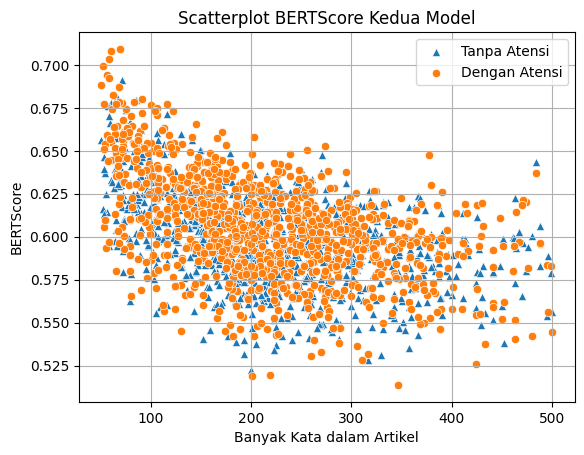

In [ ]:
# Menampilkan scatterplot
sns.scatterplot(data=df_all, x='article_length', y='BERTScore_wo_attention', label='Tanpa Atensi', marker='^')
sns.scatterplot(data=df_all, x='article_length', y='BERTScore_wi_attention', label='Dengan Atensi')
plt.title('Scatterplot BERTScore Kedua Model')
plt.xlabel('Banyak Kata dalam Artikel')
plt.ylabel('BERTScore')
plt.grid()
plt.show()

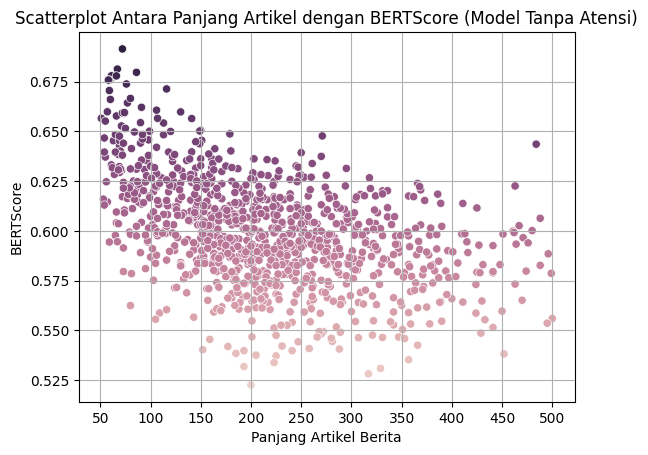

In [ ]:
# Menamplikan scatterplot antara "article_length" dengan BERTScore
sns.scatterplot(x=df_all['article_length'], y=df_all['BERTScore_wo_attention'], hue=df_all['BERTScore_wo_attention'], legend=False)
plt.xlabel('Panjang Artikel Berita')
plt.ylabel('BERTScore')
plt.xticks([i*10 for i in range(5,51,5)])
plt.title('Scatterplot Antara Panjang Artikel dengan BERTScore (Model Tanpa Atensi)')
plt.grid()
plt.show()

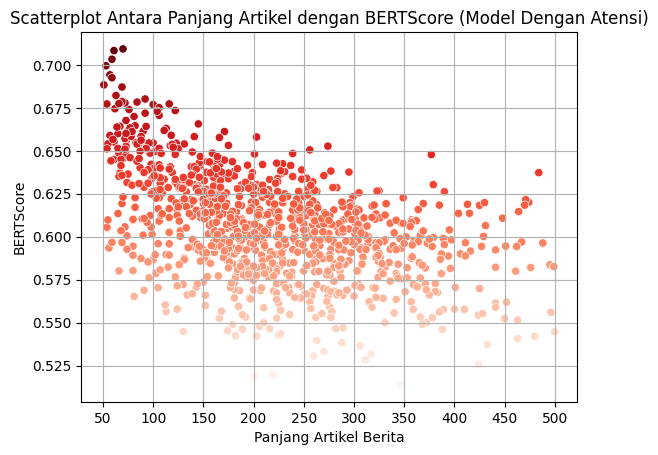

In [ ]:
# Menamplikan scatterplot antara "article_length" dengan BERTScore
sns.scatterplot(x=df_all['article_length'], y=df_all['BERTScore_wi_attention'], hue=df_all['BERTScore_wi_attention'], palette='Reds', legend=False)
plt.xlabel('Panjang Artikel Berita')
plt.ylabel('BERTScore')
plt.xticks([i*10 for i in range(5,51,5)])
plt.title('Scatterplot Antara Panjang Artikel dengan BERTScore (Model Dengan Atensi)')
plt.grid()
plt.show()

In [ ]:
df_all['count_wo'] = df_all.groupby(['BERTScore_wo_attention','article_length'])['BERTScore_wo_attention'].transform('count')

In [ ]:
df_all['count_wo'].value_counts()

1    1000
Name: count_wo, dtype: int64

In [ ]:
df_all['count_wi'] = df_all.groupby(['BERTScore_wi_attention','article_length'])['BERTScore_wi_attention'].transform('count')

In [ ]:
df_all['count_wi'].value_counts()

1    1000
Name: count_wi, dtype: int64

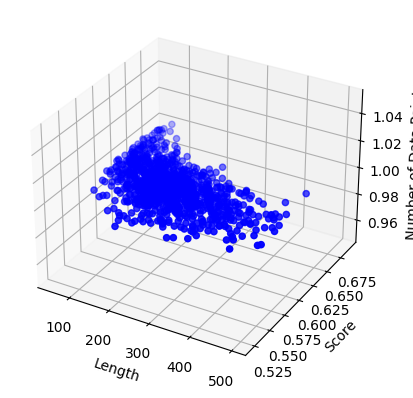

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_all['article_length'], df_all['BERTScore_wo_attention'], df_all['count'], c='b', marker='o')

ax.set_xlabel('Length')
ax.set_ylabel('Score')
ax.set_zlabel('Number of Data Points')

plt.show()

In [ ]:
# Korelasi model tanpa atensi
correlation_wo = df_all['article_length'].corr(df_all['BERTScore_wo_attention'])
correlation_wo

-0.45870799350835495

In [ ]:
# Korelasi model dengan atensi
correlation_wi = df_all['article_length'].corr(df_all['BERTScore_wi_attention'])
correlation_wi

-0.48566057557481845

In [ ]:
df_all.to_csv('/content/drive/MyDrive/Tugas Akhir 2/Files/Hasil Akhir Semua Nilai dan Judul (Final).csv')

# Demo Model

In [ ]:
# Inisialisasi library untuk padding
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Inisialisasi library TensorFlow untuk melatih model
import tensorflow as tf

from tensorflow.keras.layers import Layer, Input, LSTM, Embedding, Dense, Bidirectional, Concatenate
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.linalg import matmul
from tensorflow.keras.activations import softmax
from tensorflow import expand_dims, squeeze, concat, cast
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.math import not_equal
from tensorflow.data import Dataset

from keras import backend as K

K.clear_session()

## Model tanpa Mekanisme Atensi

In [ ]:
# Load tokenizer

# Article tokenizer
with open('/content/drive/MyDrive/Tugas Akhir 2/Model/Tokenizer/article_tokenizer_v6_subclassing_new_data_v3_without_attention.json') as f:
  data = json.load(f)
  article_tokenizer = tf.keras.preprocessing.text.tokenizer_from_json(data)

# Title tokenizer
with open('/content/drive/MyDrive/Tugas Akhir 2/Model/Tokenizer/title_tokenizer_v6_subclassing_new_data_v3_without_attention.json') as f:
  data = json.load(f)
  title_tokenizer = tf.keras.preprocessing.text.tokenizer_from_json(data)

In [ ]:
# Definisikan beberapa hyperparameter yang akan digunakan
input_size_article = len(article_tokenizer.word_index)+1
input_size_title = len(title_tokenizer.word_index)+1
max_len_content = 500
max_len_title = 15
hidden_size = 200
embedding_dim = 150
batch_size = 128
epochs = 10
dropout_rate = 0.4

### Encoder

In [ ]:
# Definisikan arsitektur encoder
class Encoder(Model):
  def __init__(self, input_dim, hidden_size, embedding_dim):
    super(Encoder, self).__init__()

    # Menginisialisasi Embedding, LSTM 1, LSTM 2, dan Concatenate layer dari Encoder
    self.encoder_embedding = Embedding(input_dim=input_dim, output_dim=embedding_dim, name='EncoderEmbedding')
    self.encoder_lstm1 = Bidirectional(LSTM(units=hidden_size, return_sequences=True, return_state=True, dropout=dropout_rate), name='BidirectionalLSTM1')
    self.encoder_lstm2 = Bidirectional(LSTM(units=hidden_size, return_sequences=True, return_state=True, dropout=dropout_rate), name='BidirectionalLSTM2')
    self.concatenate_layer = Concatenate()

  def call(self, encoder_input):

    # Menerapkan Embedding pada input sequence
    encoder_embedding_output = self.encoder_embedding(encoder_input)

    # Menerapkan LSTM 1 dan LSTM 2 pada hasil embedding
    encoder_lstm1_output, encoder_lstm1_hidden_forward, encoder_lstm1_hidden_backward, encoder_lstm1_cell_forward, encoder_lstm1_cell_backward = self.encoder_lstm1(encoder_embedding_output)
    encoder_lstm2_output, encoder_lstm2_hidden_forward, encoder_lstm2_hidden_backward, encoder_lstm2_cell_forward, encoder_lstm2_cell_backward = self.encoder_lstm2(encoder_lstm1_output)

    # Melakukan konkatenasi untuk hidden dan cell state dari forward dan backward step
    encoder_final_hidden = self.concatenate_layer([encoder_lstm2_hidden_forward, encoder_lstm2_hidden_backward])
    encoder_final_cell = self.concatenate_layer([encoder_lstm2_cell_forward, encoder_lstm2_cell_backward])

    # Mengembalikan hasil Encoder
    return encoder_final_hidden, encoder_final_cell

### Decoder

In [ ]:
# Definisikan arsitektur decoder
class Decoder(Model):
  def __init__(self, input_dim, hidden_size, embedding_dim):
    super(Decoder, self).__init__()

    # Menginisialisasi Embedding, LSTM, Attention, Attentional, dan Dense layer untuk Decoder
    self.decoder_embedding = Embedding(input_dim=input_dim, output_dim=embedding_dim, name='DecoderEmbedding')
    self.decoder_lstm1 = LSTM(units=hidden_size*2, return_sequences=True, return_state=True, dropout=dropout_rate, name='DecoderLSTM1')
    # self.attention = Attention()
    # self.attentional_hidden_state_layer = Dense(units=hidden_size, activation='tanh', name='AttentionalHiddenStateLayer')
    self.decoder_dense = Dense(units=input_size_title, name='DecoderDense')

  def call(self, decoder_inputs):

    decoder_input, encoder_final_states = decoder_inputs

    # Menerapkan Embedding pada input sequence
    decoder_embedding_output = self.decoder_embedding(decoder_input)

    # Menerapkan LSTM pada hasil embedding
    decoder_lstm1_output, decoder_lstm1_hidden, decoder_lstm1_cell = self.decoder_lstm1(decoder_embedding_output, initial_state=encoder_final_states)

    # Mendapatkan hasil logits
    logits = self.decoder_dense(decoder_lstm1_output)

    # Mengembalikan hasil logits, hidden state, dan cell state dari decoder
    return logits, decoder_lstm1_hidden, decoder_lstm1_cell

### Load Model Encoder dan Decoder

In [ ]:
encoder = Encoder(input_dim=input_size_article, hidden_size=hidden_size, embedding_dim=embedding_dim)
decoder = Decoder(input_dim=input_size_title, hidden_size=hidden_size, embedding_dim=embedding_dim)

In [ ]:
# Load model
encoder.load_weights('/content/drive/MyDrive/Tugas Akhir 2/Model/Model Final/encoder_weights_v6_subclassing_new_data_v3_without_attention')
decoder.load_weights('/content/drive/MyDrive/Tugas Akhir 2/Model/Model Final/decoder_weights_v6_subclassing_new_data_v3_without_attention')

### Fungsi untuk Prediksi

In [ ]:
# Definisikan fungsi untuk melakukan prediksi

## Fungsi ini akan menerima masukan berupa artikel berita
## Fungsi ini akan menghasilkan keluaran berupa judul berita

def generate_title_without_attention(input_text, article_tokenizer=article_tokenizer, title_tokenizer=title_tokenizer, encoder=encoder, decoder=decoder, max_title_length=15):
  input_sequence = article_tokenizer.texts_to_sequences([input_text])
  input_sequence = pad_sequences(input_sequence, maxlen=max_len_content, padding='post')

  # Inisialisasi kata pertama untuk decoder (sebagai tanda bagi decoder untuk mulai men-generate kata demi kata penyusun judul/title)
  current_word = '<start>'

  # Inisialisasi list untuk menampung kata-kata penyusun judul/title
  title_container = []

  # Mendapatkan state final (hidden state dan cell state) dari encoder yang akan dijadikan input untuk decoder
  hidden_state, cell_state = encoder.predict(input_sequence)

  while len(title_container) < max_title_length:

    # Inisialisasi vektor penampung untuk kata yang akan digunakan sebagai input untuk decoder
    input_word = np.zeros((1,1))

    # Mendapatkan index dari kata tersebut dan memasukkannnya ke dalam vektor penampung
    input_word[0, 0] = title_tokenizer.word_index[current_word]

    # Mendapatkan hasil dari decoder yang isinya
    #   1. Distribusi peluang dari semua kata yang mungkin digunakan sebagai judul
    #   2. Hidden State dan Cell State dari decoder
    decoder_output, hidden_state, cell_state = decoder.predict([input_word, (hidden_state,cell_state)], verbose=None)

    # Mendapatkan posisi (index) dari kata yang memiliki peluang tertinggi
    resulting_word_index = np.argmax(decoder_output[0])

    # Mendapatkan kata yang sebenarnya
    resulting_word = title_tokenizer.index_word[resulting_word_index]

    # Mengganti isi dari variabel current word dengan kata yang baru saja digenerate oleh Decoder, dan akan digunakan untuk input selanjutnya
    current_word = resulting_word

    # Jika kata yang digenerate oleh Decoder adalah "<end>", maka hal ini menandakan bahwa proses generate title sudah selesai
    if current_word == '<end>':
      break

    title_container.append(resulting_word)

  return " ".join(title_container)

### Prediksi

In [ ]:
# Menampilkan isi artikel berita
content = df_all['content_html'].iloc[637]
content = textwrap.fill(content, width=100)
print('Isi Artikel Berita:')
print(content)

Isi Artikel Berita:
calon gubernur dki jakarta, , mengatakan bahwa pembangunan yang seharusnya dilakukan bukan hanya
soal pembangunan fisik dan kota yang megah. jika hanya membangun fisik, kata anies, raja mesir kuno
firaun juga bisa melakukannya sejak dulu. kalau hanya membangun kota yang megah, maka firaun pun
dulu bisa membangun kota yang megah, tetapi menghadirkan keadilan, nah itu enggak bisa karena di
sana enggak ada, ujar anies di kelurahan jati, pulogadung, jakarta timur, selasa


In [ ]:
# Menampilkan judul dari model tanpa mekanisme atensi
print('Judul Keluaran Model tanpa Mekanisme Atensi:')
print(generate_title_without_attention(df_all['content_html'].iloc[637]))

Judul Keluaran Model tanpa Mekanisme Atensi:
1/1 [==============================] - 1s 521ms/step
anies ingin hidupkan pembangunan permukiman di jakarta timur


In [ ]:
# Menampilkan judul dari model dengan mekanisme atensi
print('Judul Keluaran Model dengan Mekanisme Atensi:')
print(generate_title_with_attention(df_all['content_html'].iloc[637]))

Judul Keluaran Model dengan Mekanisme Atensi:
1/1 [==============================] - 0s 424ms/step
anies sebut jakarta di kepulauan seribu harus bisa bangun kota


In [ ]:
# Menampilkan isi artikel berita
content = df_all['content_html'].iloc[526]
content = textwrap.fill(content, width=100)
print('Isi Artikel Berita:')
print(content)

Isi Artikel Berita:
bocah perempuan berusia 8 tahun ditemukan tewas di bawah ranjang rumah tetangganya di sungki,
kecamatan kertapati, palembang, sabtu sore. mayat nf ditemukan di dalam karung, tidak mengenakan
bawahan dan tangannya terikat. penemuan tersebut langsung dilaporkan ke polisi oleh pemilik rumah.
polisi yang datang langsung melakukan olah tempat kejadian dan membawa jenazah ke kamar mayat rs
bhayangkara palembang. nf diketahui menghilang sejak jumat . keluarganya mencari cari, namun tak
kunjung menemukannya


In [ ]:
# Menampilkan judul dari model tanpa mekanisme atensi
print('Judul Keluaran Model tanpa Mekanisme Atensi:')
print(generate_title_without_attention(df_all['content_html'].iloc[526]))

Judul Keluaran Model tanpa Mekanisme Atensi:
1/1 [==============================] - 0s 378ms/step
seorang ibu tewas saat minum racun serangga di hadapan anak


In [ ]:
# Menampilkan judul dari model dengan mekanisme atensi
print('Judul Keluaran Model dengan Mekanisme Atensi:')
print(generate_title_with_attention(df_all['content_html'].iloc[526]))

Judul Keluaran Model dengan Mekanisme Atensi:
1/1 [==============================] - 1s 563ms/step
jasad bocah 8 tahun ditemukan di dalam kamar di palembang


## Model dengan Mekanisme Atensi

In [ ]:
# Load tokenizer

# Article tokenizer
with open('/content/drive/MyDrive/Tugas Akhir 2/Model/Tokenizer/article_tokenizer_v6_subclassing_new_data_v3_with_attention.json') as f:
  data = json.load(f)
  article_tokenizer = tf.keras.preprocessing.text.tokenizer_from_json(data)

# Title tokenizer
with open('/content/drive/MyDrive/Tugas Akhir 2/Model/Tokenizer/title_tokenizer_v6_subclassing_new_data_v3_with_attention.json') as f:
  data = json.load(f)
  title_tokenizer = tf.keras.preprocessing.text.tokenizer_from_json(data)

In [ ]:
# Definisikan beberapa hyperparameter yang akan digunakan
input_size_article = len(article_tokenizer.word_index)+1
input_size_title = len(title_tokenizer.word_index)+1
max_len_content = 500
max_len_title = 15
hidden_size = 200
embedding_dim = 150
batch_size = 128
epochs = 10
dropout_rate = 0.4

### Encoder

In [ ]:
# Definisikan arsitektur encoder
class Encoder(Model):
  def __init__(self, input_dim, hidden_size, embedding_dim):
    super(Encoder, self).__init__()

    # Menginisialisasi Embedding, LSTM 1, LSTM 2, dan Concatenate layer dari Encoder
    self.encoder_embedding = Embedding(input_dim=input_dim, output_dim=embedding_dim, name='EncoderEmbedding')
    self.encoder_lstm1 = Bidirectional(LSTM(units=hidden_size, return_sequences=True, return_state=True, dropout=dropout_rate), name='BidirectionalLSTM1')
    self.encoder_lstm2 = Bidirectional(LSTM(units=hidden_size, return_sequences=True, return_state=True, dropout=dropout_rate), name='BidirectionalLSTM2')
    self.concatenate_layer = Concatenate()

  def call(self, encoder_input):

    # Menerapkan Embedding pada input sequence
    encoder_embedding_output = self.encoder_embedding(encoder_input)

    # Menerapkan LSTM 1 dan LSTM 2 pada hasil embedding
    encoder_lstm1_output, encoder_lstm1_hidden_forward, encoder_lstm1_hidden_backward, encoder_lstm1_cell_forward, encoder_lstm1_cell_backward = self.encoder_lstm1(encoder_embedding_output)
    encoder_lstm2_output, encoder_lstm2_hidden_forward, encoder_lstm2_hidden_backward, encoder_lstm2_cell_forward, encoder_lstm2_cell_backward = self.encoder_lstm2(encoder_lstm1_output)

    # Melakukan konkatenasi untuk hidden dan cell state dari forward dan backward step
    encoder_final_hidden = self.concatenate_layer([encoder_lstm2_hidden_forward, encoder_lstm2_hidden_backward])
    encoder_final_cell = self.concatenate_layer([encoder_lstm2_cell_forward, encoder_lstm2_cell_backward])

    # Mengembalikan hasil Encoder
    return encoder_lstm2_output, encoder_final_hidden, encoder_final_cell

### Mekanisme Atensi

In [ ]:
# Definisikan arsitektur mekanisme atensi
class Attention(Model):
  def __init__(self):
    super(Attention, self).__init__()

  def call(self, inputs):

    encoder_hiddens, decoder_hidden = inputs

    # Menghitung nilai atau skor atensi (melakukan dot product antara hidden state dari decoder dengan semua hidden state dari encoder)
    attention_scores = matmul(decoder_hidden, encoder_hiddens, transpose_b=True)

    # Mengubah skor atensi menjadi distribusi peluang dengan softmax
    attention_prob_distributions = softmax(attention_scores, axis=-1)

    # Mendapatkan vektor konteks dengan cara menjumlahkan semua hidden state dari encoder yang masing-masingnya telah diproporsi sesuai dengan skor atensi.
    context_vector = matmul(attention_prob_distributions, encoder_hiddens)

    # Mengembalikan vektor konteks yang akan digabungkan dengan hidden state dari decoder
    return context_vector

### Decoder

In [ ]:
# Definisikan arsitektur decoder
class Decoder(Model):
  def __init__(self, input_dim, hidden_size, embedding_dim):
    super(Decoder, self).__init__()

    # Menginisialisasi Embedding, LSTM, Attention, Attentional, dan Dense layer untuk Decoder
    self.decoder_embedding = Embedding(input_dim=input_dim, output_dim=embedding_dim, name='DecoderEmbedding')
    self.decoder_lstm1 = LSTM(units=hidden_size*2, return_sequences=True, return_state=True, dropout=dropout_rate, name='DecoderLSTM1')
    self.attention = Attention()
    self.attentional_hidden_state_layer = Dense(units=hidden_size, activation='tanh', name='AttentionalHiddenStateLayer')
    self.decoder_dense = Dense(units=input_size_title, name='DecoderDense')

  def call(self, decoder_inputs):

    decoder_input, encoder_hiddens, encoder_final_states = decoder_inputs

    # Menerapkan Embedding pada input sequence
    decoder_embedding_output = self.decoder_embedding(decoder_input)

    # Menerapkan LSTM pada hasil embedding
    decoder_lstm1_output, decoder_lstm1_hidden, decoder_lstm1_cell = self.decoder_lstm1(decoder_embedding_output, initial_state=encoder_final_states)

    # Mendapatkan vektor konteks dari hasil atensi
    context_vector = self.attention([encoder_hiddens, decoder_lstm1_output])

    # Menggabungkan hidden state dari decoder dengan vektor konteks dari hasil atensi
    concatenated_do_cv = concat([squeeze(decoder_lstm1_output, 1), squeeze(context_vector, 1)], -1) # do: decoder_lstm1_output, cv: context_vector

    # Menerapkan fungsi tanh pada hasil penggabungan di atas (sesuai paper Luong et al.)
    decoder_output_temporary = self.attentional_hidden_state_layer(concatenated_do_cv)

    # Mendapatkan hasil logits
    logits = self.decoder_dense(decoder_output_temporary)

    # Mengembalikan hasil logits, hidden state, dan cell state dari decoder
    return logits, decoder_lstm1_hidden, decoder_lstm1_cell

### Load Model Encoder dan Decoder

In [ ]:
encoder = Encoder(input_dim=input_size_article, hidden_size=hidden_size, embedding_dim=embedding_dim)
decoder = Decoder(input_dim=input_size_title, hidden_size=hidden_size, embedding_dim=embedding_dim)

In [ ]:
# Load model
encoder.load_weights('/content/drive/MyDrive/Tugas Akhir 2/Model/Model Final/encoder_weights_v6_subclassing_new_data_v3_with_attention')
decoder.load_weights('/content/drive/MyDrive/Tugas Akhir 2/Model/Model Final/decoder_weights_v6_subclassing_new_data_v3_with_attention')

### Fungsi untuk Prediksi

In [ ]:
# Definisikan fungsi untuk melakukan prediksi

## Fungsi ini akan menerima masukan berupa artikel berita
## Fungsi ini akan menghasilkan keluaran berupa judul berita

def generate_title_with_attention(input_text, article_tokenizer=article_tokenizer, title_tokenizer=title_tokenizer, encoder=encoder, decoder=decoder, max_title_length=15):
  input_sequence = article_tokenizer.texts_to_sequences([input_text])
  input_sequence = pad_sequences(input_sequence, maxlen=max_len_content, padding='post')

  # Inisialisasi kata pertama untuk decoder (sebagai tanda bagi decoder untuk mulai men-generate kata demi kata penyusun judul/title)
  current_word = '<start>'

  # Inisialisasi list untuk menampung kata-kata penyusun judul/title
  title_container = []

  # Mendapatkan state final (hidden state dan cell state) dari encoder yang akan dijadikan input untuk decoder
  encoder_output, hidden_state, cell_state = encoder.predict(input_sequence)

  while len(title_container) < max_title_length:

    # Inisialisasi vektor penampung untuk kata yang akan digunakan sebagai input untuk decoder
    input_word = np.zeros((1,1))

    # Mendapatkan index dari kata tersebut dan memasukkannnya ke dalam vektor penampung
    input_word[0, 0] = title_tokenizer.word_index[current_word]

    # Mendapatkan hasil dari decoder yang isinya
    #   1. Distribusi peluang dari semua kata yang mungkin digunakan sebagai judul
    #   2. Hidden State dan Cell State dari decoder
    decoder_output, hidden_state, cell_state = decoder.predict([input_word, encoder_output, (hidden_state,cell_state)], verbose=None)

    # Mendapatkan posisi (index) dari kata yang memiliki peluang tertinggi
    resulting_word_index = np.argmax(decoder_output[0])

    # Mendapatkan kata yang sebenarnya
    resulting_word = title_tokenizer.index_word[resulting_word_index]

    # Mengganti isi dari variabel current word dengan kata yang baru saja digenerate oleh Decoder, dan akan digunakan untuk input selanjutnya
    current_word = resulting_word

    # Jika kata yang digenerate oleh Decoder adalah "__end__", maka hal ini menandakan bahwa proses generate title sudah selesai
    if current_word == '<end>':
      break

    title_container.append(resulting_word)

  return " ".join(title_container)

# Test

In [ ]:
df_all['content_html'].iloc[526]

'bocah perempuan berusia 8 tahun ditemukan tewas di bawah ranjang rumah tetangganya di sungki, kecamatan kertapati, palembang, sabtu sore. mayat nf ditemukan di dalam karung, tidak mengenakan bawahan dan tangannya terikat. penemuan tersebut langsung dilaporkan ke polisi oleh pemilik rumah. polisi yang datang langsung melakukan olah tempat kejadian dan membawa jenazah ke kamar mayat rs bhayangkara palembang. nf diketahui menghilang sejak jumat . keluarganya mencari cari, namun tak kunjung menemukannya'

In [ ]:
df_all['title_wo_attention'].iloc[526]

'seorang ibu tewas saat minum racun serangga di hadapan anak'

In [ ]:
df_all['title_wi_attention'].iloc[526]

'jasad bocah 8 tahun ditemukan di dalam kamar di palembang'

In [ ]:
df_all['content_html'].iloc[637]

'calon gubernur dki jakarta, , mengatakan bahwa pembangunan yang seharusnya dilakukan bukan hanya soal pembangunan fisik dan kota yang megah. jika hanya membangun fisik, kata anies, raja mesir kuno firaun juga bisa melakukannya sejak dulu. kalau hanya membangun kota yang megah, maka firaun pun dulu bisa membangun kota yang megah, tetapi menghadirkan keadilan, nah itu enggak bisa karena di sana enggak ada, ujar anies di kelurahan jati, pulogadung, jakarta timur, selasa '

In [ ]:
df_all['title_wo_attention'].iloc[637]

'anies ingin hidupkan pembangunan permukiman di jakarta timur'

In [ ]:
df_all['title_wi_attention'].iloc[637]

'anies sebut jakarta di kepulauan seribu harus bisa bangun kota'